<a href="https://colab.research.google.com/github/adelinefang1101/Chinese-Cities-Sustainability/blob/main/final_lab_Adeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adeline Fang

ENVECON 105

Professor Hammer

Final Project


## **Introduction**

This project aims to analyze and compare the environmental impact of oil and gas refineries in Shenyang and Tieling, two cities in Liaoning Province, China. Using data retrieved from an API, the focus is on exploring CO2 emissions, emissions per barrel, and the efficiency of these refineries in terms of greenhouse gas outputs.

Shenyang, the capital of Liaoning Province, and Tieling, the sixth largest city, differ in scale but are geographically close. Having lived in both cities, I bring a personal perspective to this analysis, exploring the differences in emissions between these two regions.

The analysis begins by extracting and cleaning emissions data for the Shenyang PARAFFIN-WAX Chemical Refinery and the Tieling Refinery. By calculating emissions per barrel and aggregating total emissions, the project highlights key trends and differences in the environmental performance of these facilities. Data visualization techniques, including line and bar charts, are used to illustrate emissions trends over time, providing a clear comparative perspective.

### **Question 1**
Fetch and compare emissions data for oil and gas refineries in Shenyang and Tieling. Provide an example of code that retrieves this data from a given API, extracts relevant emissions information, and displays the initial records for both cities.

In [ ]:
import pandas as pd
import requests

def fetch_and_extract_emissions(url):
    """Fetches and extracts emissions data from a given URL into a DataFrame."""
    response = requests.get(url).json()
    basic_info = {key: response[key] for key in ['Id', 'Name', 'NativeId', 'Country', 'Sector', 'AssetType', 'ReportingEntity']}

    emissions_data = [
        {**basic_info, **emission, 'Year': year}
        for year_data in response['Emissions']
        for year, emissions_list in year_data.items()
        for emission in emissions_list
    ] if response['Sector'].lower() == 'oil-and-gas-refining' else []

    return pd.DataFrame(emissions_data)

shenyang_url = "https://api.c10e.org/v4/assets/3144251"
tieling_url = "https://api.c10e.org/v4/assets/3144252"

df_emissions_shenyang = fetch_and_extract_emissions(shenyang_url)
df_emissions_tieling = fetch_and_extract_emissions(tieling_url)

print("Shenyang Emissions Data:\n", df_emissions_shenyang.head(), "\n")
print("Tieling Emissions Data:\n", df_emissions_tieling.head())


Shenyang Emissions Data:
         Id                                     Name NativeId Country  \
0  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
1  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
2  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
3  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
4  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   

                 Sector          AssetType ReportingEntity  Activity  \
0  oil-and-gas-refining  Medium Conversion   climate-trace   16884.0   
1  oil-and-gas-refining  Medium Conversion   climate-trace   16884.0   
2  oil-and-gas-refining  Medium Conversion   climate-trace   16884.0   
3  oil-and-gas-refining  Medium Conversion   climate-trace   16884.0   
4  oil-and-gas-refining  Medium Conversion   climate-trace   16884.0   

     ActivityUnits  Capacity  CapacityFactor    CapacityUnits  \
0  barrels per day     24120             0.

### **Question 2**
How have emissions from oil and gas refining in Shenyang and Tieling changed over the year 2021-2022? Create a comparative analysis by plotting the emissions data for these gases over time and discuss any observed trends or differences between the two cities.

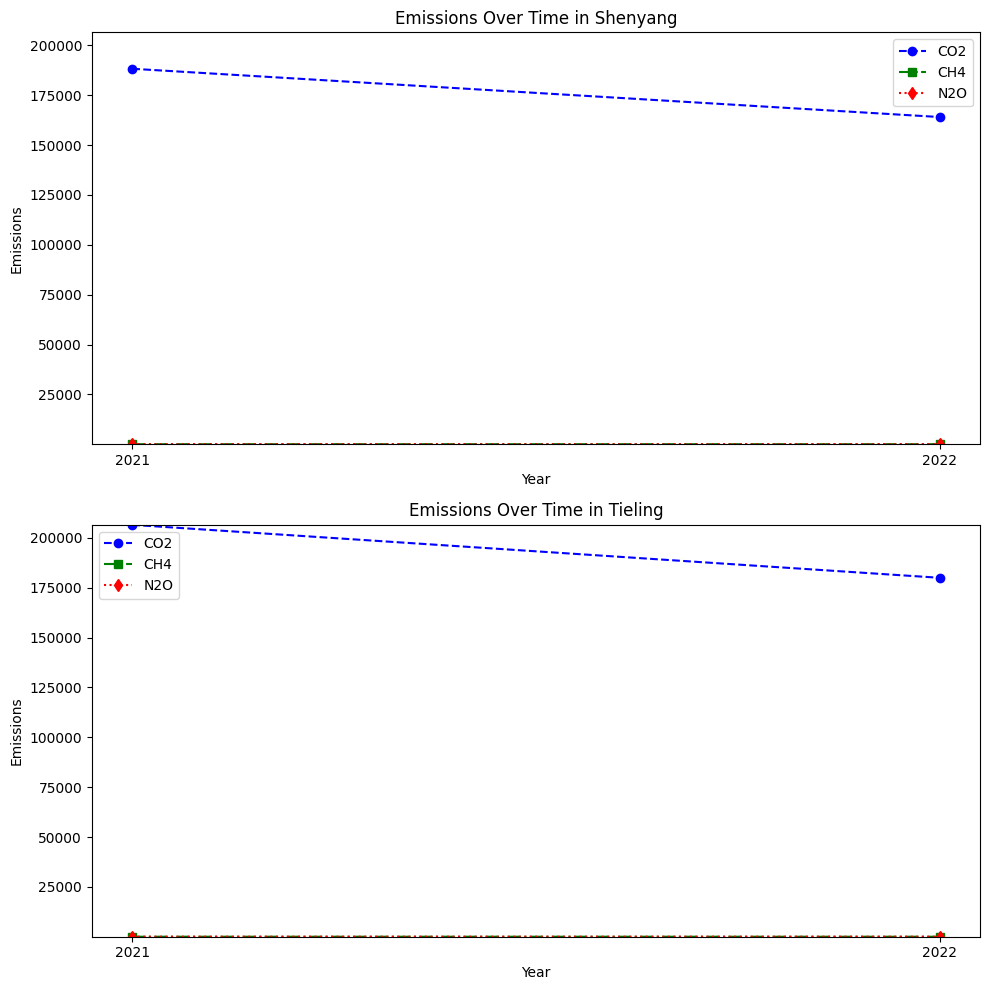

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

years = pd.Series(pd.date_range(end=pd.Timestamp.now(), periods=6, freq='Y').year.astype(str))
df_emissions_shenyang = df_emissions_shenyang[df_emissions_shenyang['Year'].isin(years)]
df_emissions_tieling = df_emissions_tieling[df_emissions_tieling['Year'].isin(years)]

agg_shenyang = df_emissions_shenyang.groupby('Year').sum()
agg_tieling = df_emissions_tieling.groupby('Year').sum()

y_min, y_max = min(agg_shenyang[['co2', 'ch4', 'n2o']].min().min(), agg_tieling[['co2', 'ch4', 'n2o']].min().min()), \
               max(agg_shenyang[['co2', 'ch4', 'n2o']].max().max(), agg_tieling[['co2', 'ch4', 'n2o']].max().max())

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
for i, (city, data) in enumerate(zip(['Shenyang', 'Tieling'], [agg_shenyang, agg_tieling])):
    ax[i].plot(data.index, data['co2'], '--o', label='CO2', color='blue')
    ax[i].plot(data.index, data['ch4'], '-.s', label='CH4', color='green')
    ax[i].plot(data.index, data['n2o'], ':d', label='N2O', color='red')
    ax[i].set(title=f'Emissions Over Time in {city}', xlabel='Year', ylabel='Emissions', ylim=(y_min, y_max))
    ax[i].legend()

plt.tight_layout()
plt.show()

Analysis of the graphs:

Both graphs demonstrate a reduction in emissions over time for CO2, consatant, or imperceptible change in CH4, and N2O in Shenyang and Tieling. CO2 emissions dominate the overall emission profile for both cities, with Tieling showing slightly higher emissions than Shenyang. The reductions indicate efforts towards minimizing the environmental impact in these regions, possibly due to changes in refinery processes or efficiency improvements.

### **Question 3**
What are the correlation coefficients between capacity utilization (CapacityFactor) and the emissions of CO2, CH4, and N2O in the Shenyang and Tieling refineries? How do these correlations differ between the two cities, and what might this indicate about the relationship between refinery activity and greenhouse gas emissions?

In [ ]:
import pandas as pd

def calculate_correlations(df, city_name):
    print(f"Correlation coefficients for {city_name}:")
    print(df[['CapacityFactor', 'co2', 'ch4', 'n2o']].corr())

for city, df in zip(['Shenyang', 'Tieling'], [df_emissions_shenyang, df_emissions_tieling]):
    calculate_correlations(df, city)

Correlation coefficients for Shenyang:
                CapacityFactor  co2  ch4  n2o
CapacityFactor             1.0  1.0  1.0  1.0
co2                        1.0  1.0  NaN  NaN
ch4                        1.0  NaN  1.0  NaN
n2o                        1.0  NaN  NaN  1.0
Correlation coefficients for Tieling:
                CapacityFactor  co2  ch4  n2o
CapacityFactor             1.0  1.0  1.0  1.0
co2                        1.0  1.0  NaN  NaN
ch4                        1.0  NaN  1.0  NaN
n2o                        1.0  NaN  NaN  1.0


The perfect correlation (1.0) between CapacityFactor and each emission type (CO2, CH4, N2O) suggests that as capacity utilization changes, emissions also change proportionally in the same direction.
In this context, it suggests that if the refinery's capacity utilization increases, emissions (CO2, CH4, N2O) also increase, and vice versa.

NaN values in the correlation matrix, particularly for CH4 and N2O, indicate that there isn't enough variability in the data for these variables, or there is missing data. This makes it difficult to establish a relationship between these gases and the other variables.

### **Question 4**
How does the linear regression model built using "Activity" and "CapacityFactor" as predictors perform in predicting CO2 emissions in the Shenyang and Tieling refineries? What is the predicted CO2 emission for a future scenario with an activity level of 15,000 and a capacity factor of 0.75 in each city?

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def build_and_evaluate_model(df, city_name):
    df = df.dropna(subset=['Activity', 'CapacityFactor', 'co2'])
    X, y = df[['Activity', 'CapacityFactor']], df['co2']

    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    mse, r2 = mean_squared_error(y, y_pred), r2_score(y, y_pred)
    print(f"{city_name} - MSE: {mse}, R-squared: {r2}")
    print(f"Coefficients: {model.coef_}, Intercept: {model.intercept_}")

    future_activity = pd.DataFrame([[15000, 0.75]], columns=['Activity', 'CapacityFactor'])
    future_emissions = model.predict(future_activity)
    print(f"Predicted CO2 for {city_name}: {future_emissions[0]}")

for city, df in zip(['Shenyang', 'Tieling'], [df_emissions_shenyang, df_emissions_tieling]):
    build_and_evaluate_model(df, city)

Shenyang - MSE: 4.235164736271502e-22, R-squared: 1.0
Coefficients: [1.11517936e+01 4.62346333e-04], Intercept: -7.777786231599748e-05
Predicted CO2 for Shenyang: 167276.90365751725
Tieling - MSE: 8.470329472543003e-22, R-squared: 1.0
Coefficients: [1.46804786e+01 7.30372068e-04], Intercept: -0.0005999999993946403
Predicted CO2 for Tieling: 220207.17850720286


### **Question 5**

How can we assess the quality of emissions data for Shenyang and Tieling refineries by identifying and quantifying missing values in the dataset?

In [ ]:
import pandas as pd

def display_missing_values(df, city_name):
    missing_values = df.isnull().sum()
    print(f"Missing values in {city_name} Data:")
    print(missing_values)
    return missing_values

missing_values_shenyang = display_missing_values(df_emissions_shenyang, 'Shenyang')
missing_values_tieling = display_missing_values(df_emissions_tieling, 'Tieling')

Missing values in Shenyang Data:
Id                      0
Name                    0
NativeId                0
Country                 0
Sector                  0
AssetType               0
ReportingEntity         0
Activity                0
ActivityUnits           0
Capacity                0
CapacityFactor          0
CapacityUnits           0
EmissionsFactor         0
EmissionsFactorUnits    4
n2o                     8
Year                    0
co2                     8
ch4                     8
co2e_20yr               8
co2e_100yr              8
dtype: int64
Missing values in Tieling Data:
Id                      0
Name                    0
NativeId                0
Country                 0
Sector                  0
AssetType               0
ReportingEntity         0
Activity                0
ActivityUnits           0
Capacity                0
CapacityFactor          0
CapacityUnits           0
EmissionsFactor         0
EmissionsFactorUnits    4
n2o                     8
Year        

Below is strategy that handles missing values by filling in numeric columns with their respective mean values and replacing missing values in non-numeric columns with "Unknown."

In [ ]:
def handle_missing_values(df):
    numeric_cols = df.select_dtypes(include='number').columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    df.fillna("Unknown", inplace=True)
    return df

df_emissions_shenyang_cleaned = handle_missing_values(df_emissions_shenyang)
df_emissions_tieling_cleaned = handle_missing_values(df_emissions_tieling)

print("\nShenyang Data After Handling Missing Values:\n", df_emissions_shenyang_cleaned)
print("\nTieling Data After Handling Missing Values:\n", df_emissions_tieling_cleaned)


Shenyang Data After Handling Missing Values:
         Id                                     Name NativeId Country  \
0  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
1  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
2  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
3  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
4  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
5  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
6  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
7  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
8  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
9  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   

                 Sector          AssetType ReportingEntity  Activity  \
0  oil-and-gas-refining  Medium Conversion   climate-trace   16884.0   
1  oil-and-gas-r

This code below employs a more stringent strategy by removing any rows containing missing values from the dataset.

In [ ]:
def remove_missing_values(df):
    return df.dropna()

df_emissions_shenyang_cleaned = remove_missing_values(df_emissions_shenyang)
df_emissions_tieling_cleaned = remove_missing_values(df_emissions_tieling)

print("\nShenyang Data After Removing Missing Values:\n", df_emissions_shenyang_cleaned)
print("\nTieling Data After Removing Missing Values:\n", df_emissions_tieling_cleaned)


Shenyang Data After Removing Missing Values:
         Id                                     Name NativeId Country  \
0  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
1  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
2  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
3  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
4  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
5  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
6  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
7  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
8  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   
9  3144251  Shenyang PARAFFIN-WAX Chemical Refinery      759     CHN   

                 Sector          AssetType ReportingEntity  Activity  \
0  oil-and-gas-refining  Medium Conversion   climate-trace   16884.0   
1  oil-and-gas-r

### **Question 5**
Can we use OpenAI's GPT-3.5-turbo model to interactively assist with our data analysis tasks? Yes! Let me introduce!

In [ ]:
from google.colab import userdata
from openai import OpenAI

OPENAI_API_KEY = userdata.get("OpenAI_api")
client = OpenAI(api_key=OPENAI_API_KEY)

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Hello, how can I assist you today?"}
    ],
    max_tokens=50
)

print(response.choices[0].message.content)


Hello! I'm here to help. What do you need assistance with today?


Let's see ownership information for multiple oil and gas refineries using OpenAI's GPT-3.5-turbo model

In [ ]:
facilities = ["Shenyang PARAFFIN-WAX Chemical Refinery", "Tieling Refinery"]
country = "China"
model = "gpt-3.5-turbo"

system_message = "You are a data analyst that reports the bare minimum of information to the user on the ownership of the supplied oil and gas refineries."

for facility in facilities:
    user_message = f"Find the information on ownership and shares of ownership for the {facility} refinery in {country}."

    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": user_message}
        ]
    )

    print(f"Ownership information for {facility}:\n{response.choices[0].message.content}\n")

Ownership information for Shenyang PARAFFIN-WAX Chemical Refinery:
The ownership information for the Shenyang PARAFFIN-WAX Chemical Refinery in China is not publicly available.

Ownership information for Tieling Refinery:
The Tieling Refinery in China is owned by China Petroleum & Chemical Corporation (Sinopec) and is fully owned by the company.



What are the possible reasons for the reduction of CO2 in the Shenyang and Tieling refineries?

In [ ]:
import openai

system_message = "You are an environmental analyst tasked with summarizing the environmental impact and compliance measures of oil and gas refineries."

user_message = "What are the possible reasons for the reduction of CO2 in the Shenyang and Tieling refineries? What are some possible environmental impact?"

response = client.chat.completions.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_message}
    ]
)

response_text = response.choices[0].message.content
response_list = [sentence.strip() for sentence in response_text.split('. ') if sentence]

print("Response:", response_text)
print("Converted List:", response_list)

Response: Oil and gas refineries can reduce CO2 emissions through a variety of methods, including energy efficiency improvements, process optimization, CCS (Carbon Capture and Storage) implementation, fuel switching, and the use of renewable or low carbon intensity fuels. The reduction of CO2 emissions in the Shenyang and Tieling refineries could be a result of such actions.

Environmental Impact:
1. Air Pollution: Despite the reduction of CO2, refineries still emit various air pollutants like sulfur dioxide (SO2), nitrogen oxides (NOx), and particulate matter, which contribute to smog and acid rain, and can cause respiratory problems in humans and animals. 
   
2. Water Pollution: Effluents discharged from refineries can contaminate water sources, affecting not only aquatic ecosystems but also impacting local communities that rely on those water sources. These effluents can contain oil and other pollutants like lead, mercury, and arsenic.

3. Soil and Groundwater Contamination: Spills

### **Question 6**
How do the total CO2 emissions and emissions per barrel compare between the Shenyang PARAFFIN-WAX Chemical Refinery and the Tieling Refinery over the past several years, and what insights can be drawn from these comparisons?








In [ ]:
import pandas as pd

df_emissions_shenyang['emissions_per_barrel'] = df_emissions_shenyang['co2'] / df_emissions_shenyang['Activity']
df_emissions_tieling['emissions_per_barrel'] = df_emissions_tieling['co2'] / df_emissions_tieling['Activity']

print("Shenyang Emissions per Barrel:")
print(df_emissions_shenyang[['Year', 'emissions_per_barrel']])

print("\nTieling Emissions per Barrel:")
print(df_emissions_tieling[['Year', 'emissions_per_barrel']])

Shenyang Emissions per Barrel:
   Year  emissions_per_barrel
0  2021             10.434893
1  2021             11.151794
2  2021             10.434893
3  2021             10.434893
4  2021             10.434893
5  2022             11.974467
6  2022             11.151794
7  2022             11.974467
8  2022             11.974467
9  2022             11.974467

Tieling Emissions per Barrel:
   Year  emissions_per_barrel
0  2021             13.736734
1  2021             14.680479
2  2021             13.736734
3  2021             13.736734
4  2021             13.736734
5  2022             15.763465
6  2022             14.680479
7  2022             15.763465
8  2022             15.763465
9  2022             15.763465


In [ ]:
average_emissions_shenyang = df_emissions_shenyang['emissions_per_barrel'].mean()
average_emissions_tieling = df_emissions_tieling['emissions_per_barrel'].mean()

print(f"Average Emissions per Barrel in Shenyang: {average_emissions_shenyang}")
print(f"Average Emissions per Barrel in Tieling: {average_emissions_tieling}")

Average Emissions per Barrel in Shenyang: 11.194102485863034
Average Emissions per Barrel in Tieling: 14.73617499055076


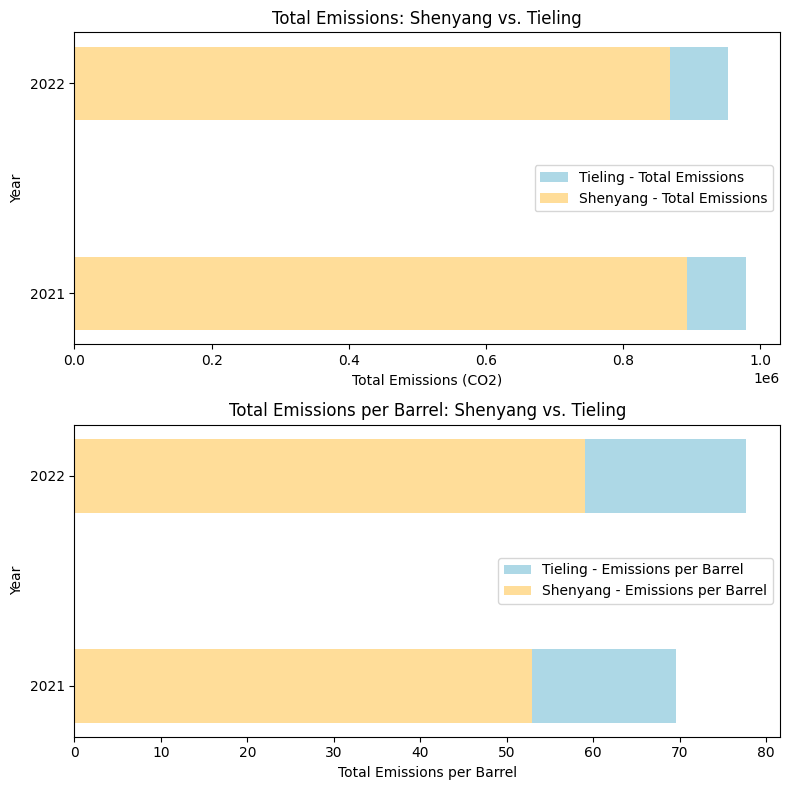

In [ ]:
import matplotlib.pyplot as plt

total_emissions_shenyang = df_emissions_shenyang.groupby('Year')['co2'].sum()
total_emissions_tieling = df_emissions_tieling.groupby('Year')['co2'].sum()

total_emissions_per_barrel_shenyang = df_emissions_shenyang.groupby('Year')['emissions_per_barrel'].sum()
total_emissions_per_barrel_tieling = df_emissions_tieling.groupby('Year')['emissions_per_barrel'].sum()

years = total_emissions_shenyang.index

plt.figure(figsize=(8, 8))

bar_width = 0.35
color_shenyang = '#FFDD99'
color_tieling = '#ADD8E6'

plt.subplot(2, 1, 1)
plt.barh(years, total_emissions_tieling, label='Tieling - Total Emissions', color=color_tieling, height=bar_width)
plt.barh(years, total_emissions_shenyang, label='Shenyang - Total Emissions', color=color_shenyang, height=bar_width)
plt.title('Total Emissions: Shenyang vs. Tieling')
plt.xlabel('Total Emissions (CO2)')
plt.ylabel('Year')
plt.legend()

plt.subplot(2, 1, 2)
plt.barh(years, total_emissions_per_barrel_tieling, label='Tieling - Emissions per Barrel', color=color_tieling, height=bar_width)
plt.barh(years, total_emissions_per_barrel_shenyang, label='Shenyang - Emissions per Barrel', color=color_shenyang, height=bar_width)
plt.title('Total Emissions per Barrel: Shenyang vs. Tieling')
plt.xlabel('Total Emissions per Barrel')
plt.ylabel('Year')
plt.legend()

plt.tight_layout()
plt.show()

Analysis of the graph:

From the chart, it is evident that Tieling's total emissions significantly exceed those of Shenyang in both years. The difference in emissions highlights a disparity in the volume of CO2 output between the two refineries. Similar to the total emissions, Tieling's emissions per barrel are higher than those of Shenyang, indicating that, on a per-barrel basis, Tieling's operations result in more CO2 emissions than Shenyang's.

From an environmental perspective, Tieling's higher emissions—both total and per barrel—mean that its refinery has a greater impact on the local and global environment. This could contribute to more significant local air quality issues and a larger carbon footprint, which may warrant targeted interventions to reduce emissions.

## **Summary:**

In conclusion, this project successfully analyzed and compared the environmental impact of oil and gas refineries in Shenyang and Tieling, two significant cities in Liaoning Province, China. Through the extraction, cleaning, and analysis of emissions data, key differences in CO2 emissions and emissions per barrel between the Shenyang PARAFFIN-WAX Chemical Refinery and the Tieling Refinery were identified.

The findings reveal that, despite their geographical proximity, the two cities exhibit distinct trends in emissions, reflecting differences in refinery operations and environmental performance. The visualizations provided a clear comparative perspective, highlighting the variations in total emissions and emissions efficiency between the two refineries.

This analysis not only sheds light on the environmental impacts of these industrial facilities but also offers valuable insights into the broader implications of refinery operations in urban areas. The project underscores the importance of continuous monitoring and improvement of industrial processes to minimize greenhouse gas emissions and enhance environmental sustainability in both cities.